## Зачетная задача. Вариант 14.

# Интерполяция. Длина тормозного пути

Цель работы: вычислить максимальную скорость автомобиля, чтобы длина тормозного пути не превосходила бы $60$ путем
* кусочной линейной интерполяцией,
* кусочной кубической интерполяцией,
* обратной кубической интерполяцией. 

Придумать и реализовать новый способ. Нарисовать графики построенных интерполянтов. Сравнить результаты.

Начальные данные: таблица длины тормозного пути некоторого автомобиля в зависимости от его скорости   в начале пути:  
```
  v      d
  0      0
 10      5
 20     20
 30     46
 40     70
 50    102
 60    153
```

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Представим начальные данные слудующим образом:

In [5]:
v = np.array([0,  10,  20,  30,  40,  50, 60])
d = np.array([0, 5, 20,  46, 70, 102, 153])

Под словом интерполяция в математике понимают процесс нахождени значений какой-либо функции в некоторой точке по ее значениям в других точках. Cуществуют различные методы интерполяции, рассмотрим некоторые из них.

## Кусочно-линейная интерполяция

Построим график кусочно-линейной функции и найдем максимально возможную скорость

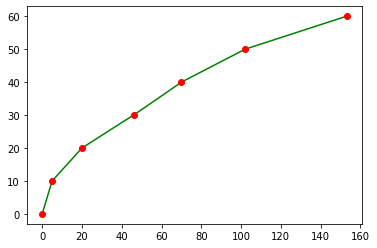

In [6]:
linear_int = interpolate.interp1d(d, v, kind = 'linear')
dd = np.linspace(0, 153, 500)
vv = linear_int(dd)
plt.plot(dd, vv, color = 'g')
plt.plot(d, v, 'or')
pass

In [7]:
linear_int(60)

array(35.83333333)

Методом кусочно-линейной интерполяции мы выяснили, что скорость автомобиля не должна превышать $35.83333333$

## Кусочно-кубическая интерполяция

Построим график для кусочно-кубической интерполяции

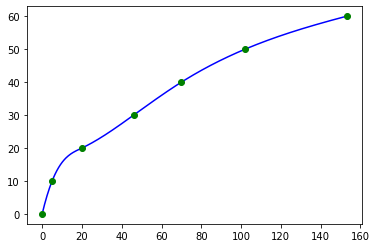

In [8]:
qube_int = interpolate.interp1d(d, v, kind = 'cubic')
dd = np.linspace(0, 153, 500)
vv = qube_int(dd)
plt.plot(dd, vv, color = 'b')
plt.plot(d, v, 'og')
pass

Вычислим его значение в требуемой точке

In [9]:
qube_int(60)

array(36.00342639)

Методом кубической интрерполяции мы выяснили, что для выполнения условия скорость должна быть меньше $36.00342639$

## Эрмитов кусочно-кубический интерполянт

Решим эту задачу при помощи Эрмитова кусочно-кубического интерполянта

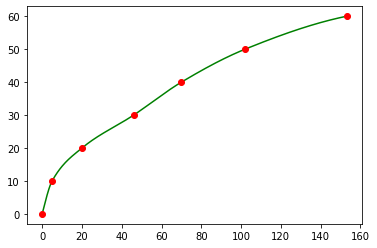

In [16]:
pchip  = interpolate.pchip(d, v)
dd = np.linspace(0, 153, 500)
vv = pchip(dd)
plt.plot(dd, vv, color = 'g')
plt.plot(d, v, 'or')
pass

In [26]:
pchip(60)

array(35.98756535)

Методом Эрмитовой кусочно-кубической интрерполяции мы выяснили, что для выполнения условия скорость должна быть меньше $35.98756535$

## Обратная кубическая интерполяция

Построим график обратной кубической интерполяции

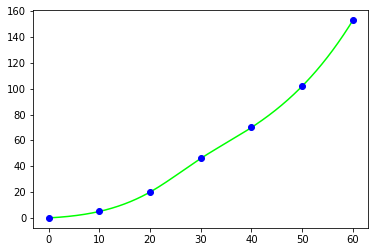

In [12]:
rev_qube_int = interpolate.interp1d(v, d, kind = 'cubic')
vv = np.linspace(0, 60, 500)
dd = rev_qube_int(vv)
plt.plot(vv, dd, color = 'lime')
plt.plot(v, d, 'ob')
pass

## Сравнение результатов

Сравним результаты обратной кубической интерполяции и линейной интерполяции 

In [13]:
rev_qube_int(35.83333333)

array(59.92784287)

Получаем результат примерно на $0.1$ меньше требуемого

Сравним результаты прямой и обратной кубической интерполяции

In [14]:
rev_qube_int(36.00342639)

array(60.32398532)

Получаем результат примерно на $0.3$ больше требуемого

Сравним результаты обратной кубической интерполяции и Эрмитовой кусочно-кубической интрерполяции

In [15]:
rev_qube_int(35.98756535)

array(60.28702257)

Получаем результат примерно на $0.2$ больше требуемого

Таким образом, прямая кубическая интерполяция дала наибольший результат ($36.00342639$), за ней идёт Эрмитова кусочно-кубическая интрерполяция ($35.98756535$), затем обратная кубическая интерполяция и линейная интерполяция дала наименьший результат ($35.83333333$)

Построим графики кусочно-линейного интерполянта, кусочно-кубического интерполянта и Эрмитова кусочно-кубического интерполянта и сравним их:

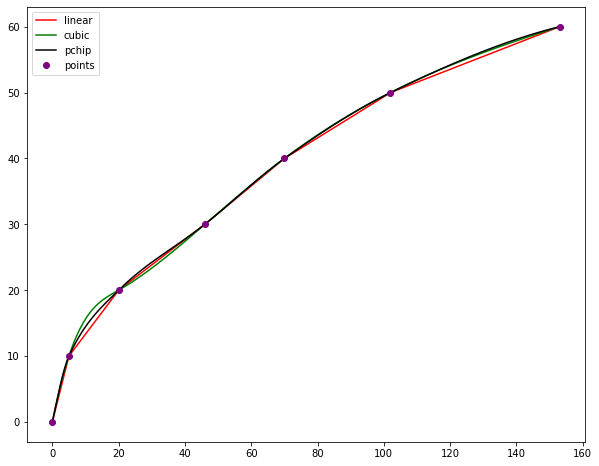

In [29]:
linear_int = interpolate.interp1d(d, v, kind = 'linear')
cubic_int =  interpolate.interp1d(d, v, kind = 'cubic')
pchip1 = interpolate.pchip(d, v)

xx = np.linspace(0, 153, 500)
plt.figure(figsize = (10, 8))
plt.plot(xx, linear_int(xx), 'r', label = 'linear')
plt.plot(xx, cubic_int(xx), 'g', label = 'cubic')
plt.plot(xx, pchip(xx),'k', label = 'pchip')
plt.plot(d, v, 'o', color = 'purple', label = 'points')

plt.legend(loc = 2)

pass

По графику видно, что график Эрмитова кусочно-кубического интерполянта оказался наиболее плавным, и его значения будут наиболее приближены к реальным.

## Выводы:

1. Пользуясь различными методами интерполяции, получаем различные значения
2. Наиболее точным показал себя метод Эрмитовой кусочно-кубической интерполяции. Он наиболее плавен и близок к реальным значениям начальных данных